In [203]:
import pandas as pd           
import matplotlib.pyplot as plt

In [204]:
def analyse_differents_vp(data_set):
    occurence={}
    df=pd.read_csv(data_set)
    for i in df["Vp"] : 
        if i not in occurence.keys() :
            occurence[i]=1
        else:
            occurence[i]=occurence[i]+1
    return occurence

def analyse_mean_vp(df):
    Vpmean=0
    j=0
    for i in df["Vp"] : 
        j=j+1
        Vpmean=i+Vpmean
        
    return Vpmean/j

def analyse_mean_turn(df):
    turnmean=0
    j=0
    for i in df["numberOfTurn"] : 
        j=j+1
        turnmean=i+turnmean
        
    return turnmean/j

def analyse_differents_numberOfTurn(data_set):
    occurence={}
    df=pd.read_csv(data_set)
    for i in df["numberOfTurn"] : 
        if i not in occurence.keys() :
            occurence[i]=1
        else:
            occurence[i]=occurence[i]+1
    return occurence


def graph_NumberOfTurn(data_set):
   
    donnees=analyse_differents_numberOfTurn(data_set)
    tours = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(tours), 0.5)) 
    # Créer le graphique à barres
    plt.bar(tours, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Occurrences of Turns')
    plt.xlabel('Number of Turns')
    plt.ylabel('Occurrences')
    plt.xticks(tours)
    plt.show()
    plt.clf()
    
def graph_Vp(data_set) :   
    
    donnees=analyse_differents_vp(data_set)
    vps = list(donnees.keys())
    print(vps)
    occurrences = list(donnees.values())
    
    # Créer le graphique à barres
    plt.bar(vps, occurrences, color='blue', width=0.005)

    # Ajouter des titres et des libellés
    plt.title('Vp Occurences')
    plt.xlabel('Vp')
    plt.ylabel('Occurrences')
    plt.xticks(vps)
    plt.show()
    plt.clf()


    




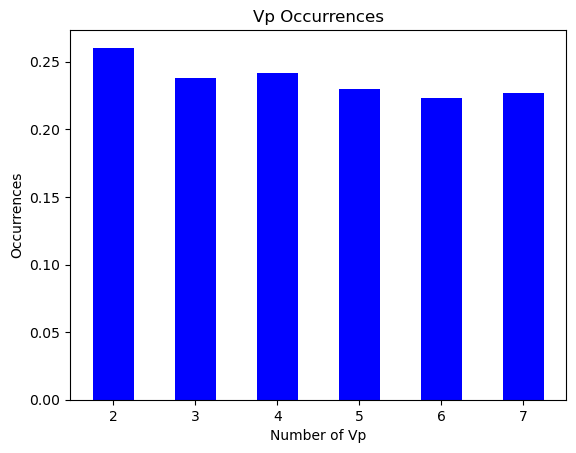

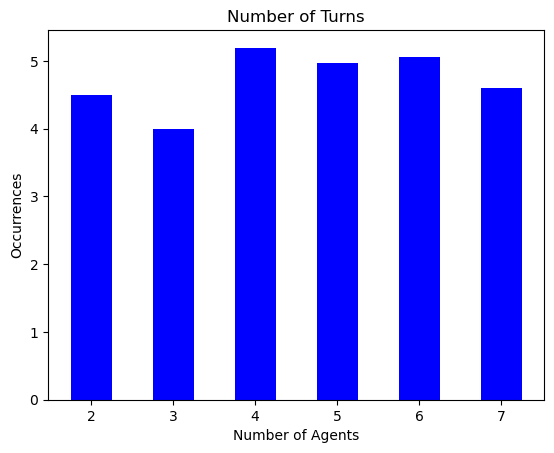

<Figure size 640x480 with 0 Axes>

In [205]:

import os


def create_csv_link(dossier):
    # Vérifier si le chemin spécifié est un dossier
    if not os.path.isdir(dossier):
        return "The specified path is not a folder."

    # Initialiser le compteur de fichiers
    nombre_fichiers = 0
    liste_of_df=[]
    # Parcourir tous les éléments du dossier
    for element in os.listdir(dossier):
        chemin_element = os.path.join(dossier, element)
        # Vérifier si l'élément est un fichier
        
        df=pd.read_csv(chemin_element)
        liste_of_df.append(df)

    return liste_of_df


def all_graph_stat_vp(df_liste):
        occurence={}
        for i in df_liste : 
            if len(i["order"][0].split(",")) in occurence.keys() :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_vp(i)+occurence[len(i["order"][0].split(","))][0],occurence[len(i["order"][0].split(","))][1]+1]
            else :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_vp(i),1]
        reponse={}
        for key,value in occurence.items():
            
            reponse[key]=(value[0]/value[1])
        return reponse
    
def all_graph_stat_turn(df_liste):
        occurence={}
        for i in df_liste : 
            if len(i["order"][0].split(",")) in occurence.keys() :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_turn(i)+occurence[len(i["order"][0].split(","))][0],occurence[len(i["order"][0].split(","))][1]+1]
            else :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_turn(i),1]
        reponse={}
        for key,value in occurence.items():
            
            reponse[key]=(value[0]/value[1])
        return reponse
    
def affichage_graph_vp(donnees):
    
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5)) 
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Vp Occurrences')
    plt.xlabel('Number of Vp')
    plt.ylabel('Occurrences')
    plt.xticks(vp)
    plt.show()
    plt.clf()
    
def affichage_graph_turn(donnees):
    
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5)) 
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Number of Turns')
    plt.xlabel('Number of Agents')
    plt.ylabel('Occurrences')

    plt.xticks(vp)
    plt.show()
    plt.clf()

path="csv_iteration_4/same_ug_new_agents_csv_1"
liste_of_df=create_csv_link(path)   
affichage_graph_vp(all_graph_stat_vp(liste_of_df))
affichage_graph_turn(all_graph_stat_turn(liste_of_df))


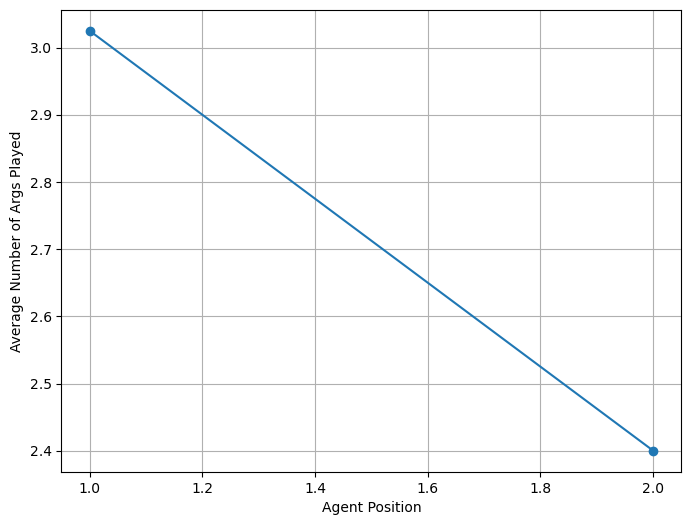

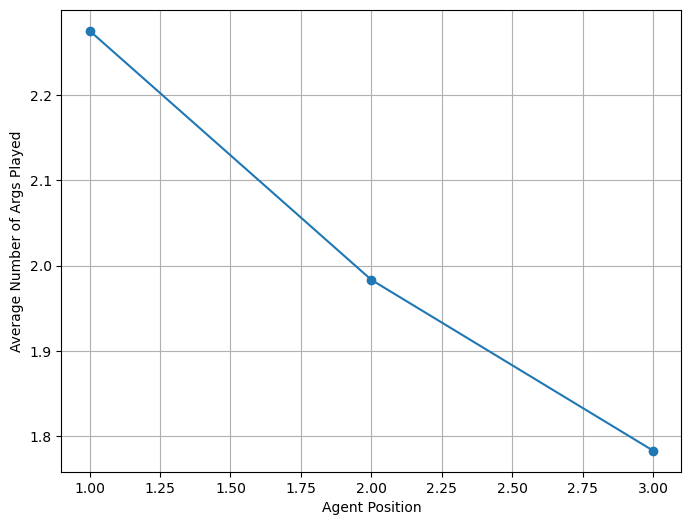

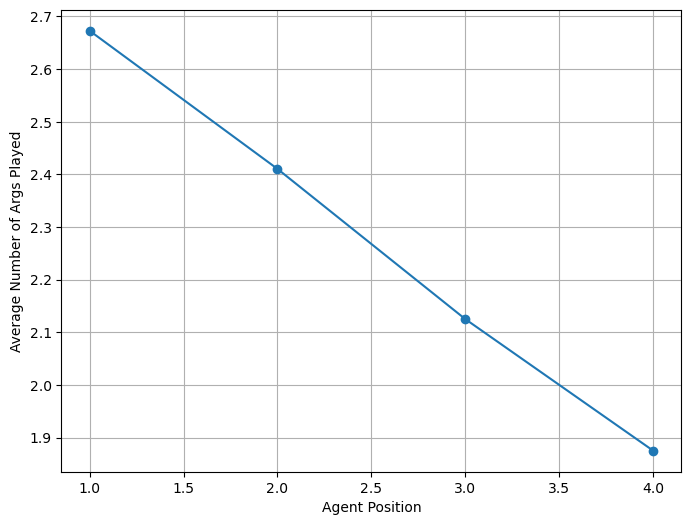

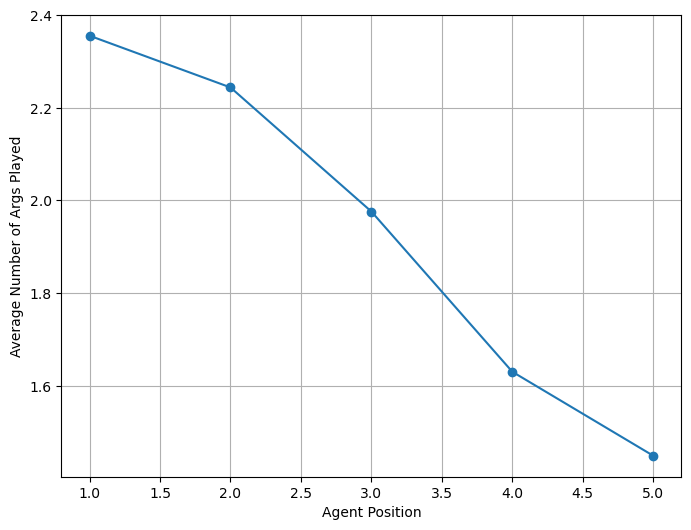

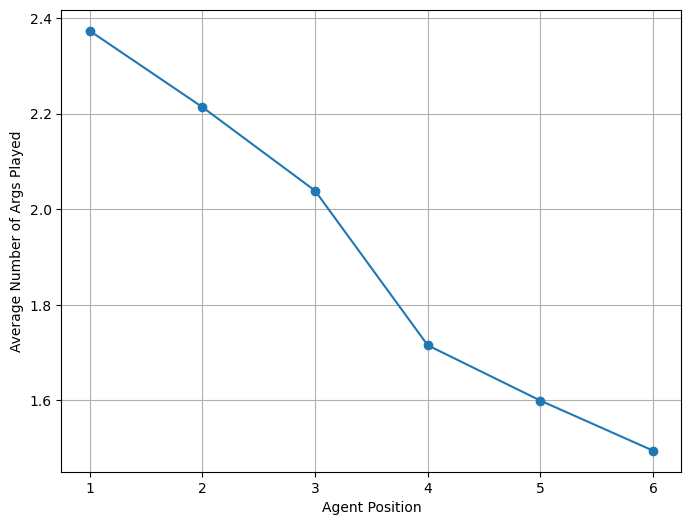

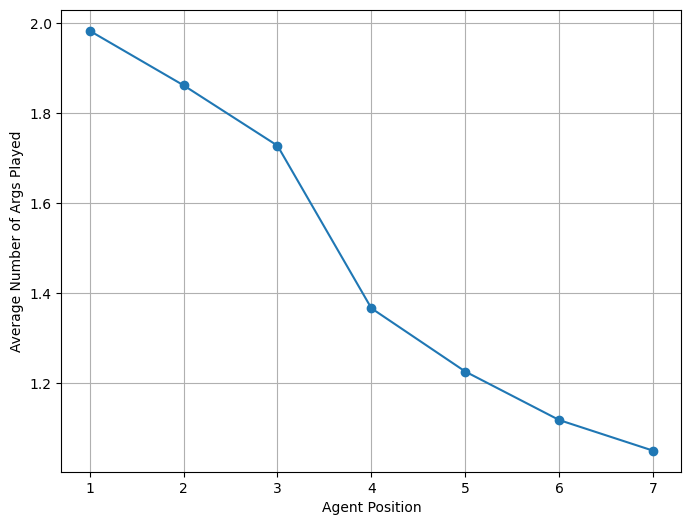

{1: 3.025, 2: 2.4}
{1: 2.275, 2: 1.9833333333333334, 3: 1.7833333333333334}
{1: 2.6729166666666666, 2: 2.410416666666667, 3: 2.125, 4: 1.875}
{1: 2.3554166666666667, 2: 2.24375, 3: 1.9758333333333333, 4: 1.63, 5: 1.44875}
{1: 2.3733333333333335, 2: 2.2136805555555554, 3: 2.03875, 4: 1.7154166666666666, 5: 1.5996527777777778, 6: 1.4949305555555557}
{1: 1.983501984126984, 2: 1.8622023809523809, 3: 1.7280257936507937, 4: 1.3665575396825398, 5: 1.225843253968254, 6: 1.118075396825397, 7: 1.0499404761904763}


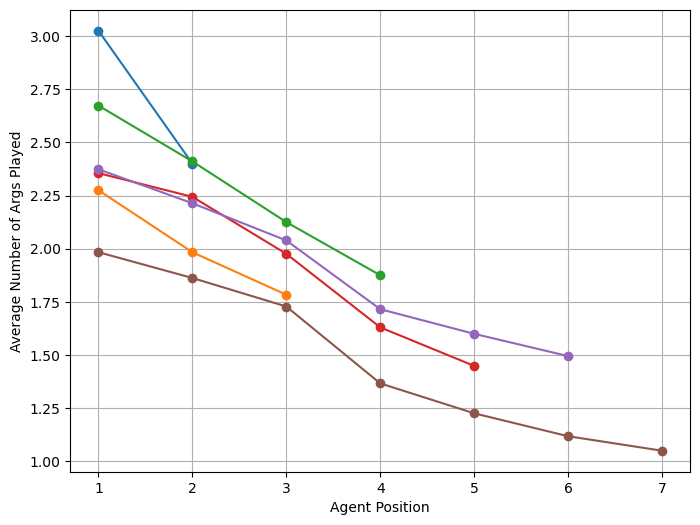

In [206]:

def number_argument_play(dfs,nbARG):
    taille = len(dfs[0])
    dpn = {}
    for i in range(nbARG):
        dpn[i+1]=0
    
    for df in dfs : 
        for j in range(taille) :
            ordre=1
            for i in df["order"][j].split(",") :
                dpn[ordre]=int(df[i[1]][j].split("None")[len(df[i[1]][j].split("None"))-1].split(",")[1])+int(dpn[ordre])
                ordre=ordre+1
    
    for i in range(nbARG):
        dpn[i+1]=dpn[i+1]/(taille*len(dfs))
   
    return dpn

def afficher_graphique(dictionnaire):
    # Extraire les clés et les valeurs du dictionnaire
    cles = list(dictionnaire.keys())
    valeurs = list(dictionnaire.values())
    
    # Créer le graphique
    plt.figure(figsize=(8, 6))
    plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('Agent Position')
    plt.ylabel('Average Number of Args Played')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()

def afficher_graphique_all_graph(liste_of_df):
    
    plt.figure(figsize=(8, 6))
    for i in range(2,8):
        dictionnaire = number_argument_play(createAgentNumber(i,liste_of_df),i)
        print(dictionnaire)
        cles = list(dictionnaire.keys())
        valeurs = list(dictionnaire.values())
        
        plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('Agent Position')
    plt.ylabel('Average Number of Args Played')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()
  
def createAgentNumber(number,liste_of_df):
    test=[] 
    for i in liste_of_df:
        if len(i["order"][0].split(","))==number:
            test.append(i)
    return test

for i in range(2,8):
    afficher_graphique(number_argument_play(createAgentNumber(i,liste_of_df),i))
    
afficher_graphique_all_graph(liste_of_df)
        

[['False', ' 2', ' 6]'], ['False', ' 0', ' 3]'], ['False', ' 2', ' 6]'], ['True', ' 2', ' 17]'], ['True', ' 1', ' 9]'], ['False', ' 2', ' 5]'], ['True', ' 1', ' 25]'], ['True', ' 1', ' 17]'], ['True', ' 1', ' 9]'], ['False', ' 2', ' 2]'], ['True', ' 1', ' 19]'], ['False', ' 1', ' 4]'], ['True', ' 1', ' 14]'], ['True', ' 1', ' 6]'], ['True', ' 1', ' 11]'], ['True', ' 1', ' 21]'], ['True', ' 0', ' 23]'], ['False', ' 3', ' 3]'], ['True', ' 0', ' 4]'], ['True', ' 1', ' 17]'], ['True', ' 3', ' 24]'], ['False', ' 2', ' 4]'], ['True', ' 1', ' 15]'], ['True', ' 1', ' 14]'], ['True', ' 0', ' 7]'], ['True', ' 0', ' 24]'], ['True', ' 0', ' 15]'], ['False', ' 2', ' 2]'], ['False', ' 1', ' 2]'], ['False', ' 3', ' 6]'], ['True', ' 1', ' 8]'], ['True', ' 1', ' 17]'], ['True', ' 1', ' 21]'], ['True', ' 0', ' 6]'], ['False', ' 1', ' 7]'], ['True', ' 1', ' 5]'], ['True', ' 1', ' 28]'], ['False', ' 1', ' 1]'], ['True', ' 1', ' 25]'], ['True', ' 0', ' 19]'], ['True', ' 0', ' 11]'], ['True', ' 1', ' 5]'], 

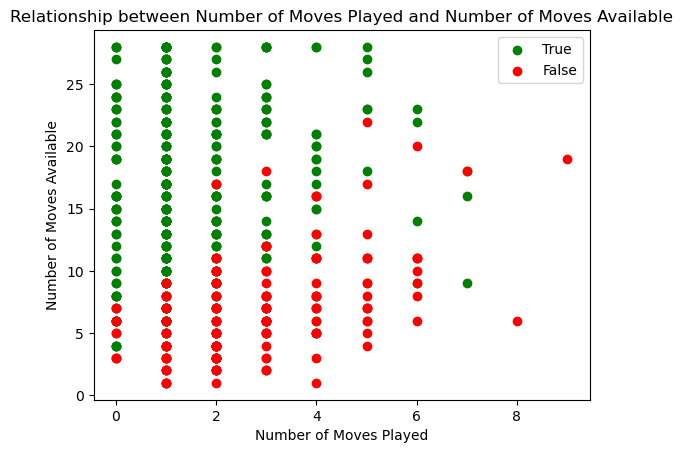

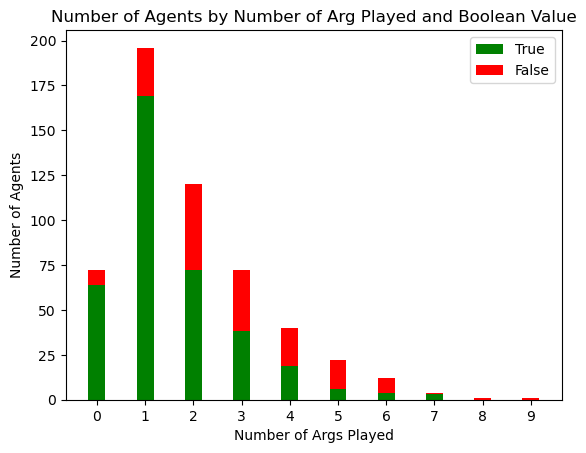

In [207]:
import numpy as np
def number_argument_play_all_point(dfs):
    
    dpn = []
    
    
    for df in dfs : 
            for i in range(len(df["order"][0].split(","))) :
                boolean=df[f"{i}"][0].split(",")[1].strip()
                nb_coup_play=df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))-1].split(",")[1]
                nb_coup_possible=df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))-1].split(",")[3]
                dpn.append([boolean,nb_coup_play,nb_coup_possible])
    
   
    
    return dpn
def plot_agents_bar_chart(data):
    # Création d'un dictionnaire pour stocker le nombre d'agents par nombre de coups et valeur boolean
    agent_counts = {}

    for item in data:
        # Récupération du nombre de coups et de la valeur boolean
        coup = int(item[1].strip())
        boolean = item[0]

        # Mise à jour du dictionnaire
        if coup not in agent_counts:
            agent_counts[coup] = {'True': 0, 'False': 0}
        agent_counts[coup][boolean] += 1

    # Préparation des données pour le graphique
    coups = sorted(agent_counts.keys())
    true_counts = [agent_counts[coup]['True'] for coup in coups]
    false_counts = [agent_counts[coup]['False'] for coup in coups]

    # Création du diagramme en barres
    width = 0.35  # Largeur des barres
    fig, ax = plt.subplots()
    ind = np.arange(len(coups))  # Emplacement des barres

    p1 = ax.bar(ind, true_counts, width, color='green', label='True')
    p2 = ax.bar(ind, false_counts, width, color='red', bottom=true_counts, label='False')

    ax.set_xlabel('Number of Args Played')
    ax.set_ylabel("Number of Agents")
    ax.set_title('Number of Agents by Number of Arg Played and Boolean Value')

    ax.set_xticks(ind)
    ax.set_xticklabels(coups)
    ax.legend()

    plt.show()

data=number_argument_play_all_point(liste_of_df)
print(data)


# Nettoyer les espaces dans les données et convertir les valeurs en entiers
cleaned_data = [[d[0].strip(), d[1].strip(), d[2].strip()] for d in data]

# Séparer les données en deux listes : une pour les valeurs "True" et une pour les valeurs "False"
true_values = [(int(d[1]), int(d[2][:-1])) for d in cleaned_data if d[0] == 'True']
false_values = [(int(d[1]), int(d[2][:-1])) for d in cleaned_data if d[0] == 'False']

# Vérifier si les listes sont vides
if true_values:
    true_x, true_y = zip(*true_values)
else:
    true_x, true_y = [], []

if false_values:
    false_x, false_y = zip(*false_values)
else:
    false_x, false_y = [], []

# Créer le graphique
plt.scatter(true_x, true_y, color='green', label='True')
plt.scatter(false_x, false_y, color='red', label='False')

# Ajouter une légende
plt.legend()

# Ajouter des étiquettes
plt.xlabel('Number of Moves Played')
plt.ylabel('Number of Moves Available')

# Afficher le graphique
plt.title('Relationship between Number of Moves Played and Number of Moves Available')
plt.show()

plot_agents_bar_chart(data)


In [208]:



import pandas as pd

# Définir les dictionnaires
dictionnaire1 = all_graph_stat_vp(liste_of_df)
dictionnaire2 = all_graph_stat_turn(liste_of_df)

# Créer un DataFrame initial avec les dictionnaires
df = pd.DataFrame({'vp': dictionnaire1, 'tour': dictionnaire2})

# Boucle pour ajouter d'autres dictionnaires au DataFrame
for i in range(2, 8):
    temp_dic = number_argument_play(createAgentNumber(i,liste_of_df), i)
    nouveau_df = pd.DataFrame(temp_dic, index=[f"nbCoup/byTurnW{i}"]).T
    df = pd.concat([df, nouveau_df], axis=1)

# Afficher le DataFrame

print(df["nbCoup/byTurnW2"])
# Exporter le DataFrame au format CSV
pt=path.split("/")[0]
if not os.path.exists("csv/csv_UG"):
        os.mkdir("csv/csv_UG")
df.to_csv(f"csv/csv_UG/{pt}.csv")

6      NaN
7      NaN
2    2.400
3      NaN
4      NaN
5      NaN
1    3.025
Name: nbCoup/byTurnW2, dtype: float64


In [209]:
import os
import shutil

def get_all_public_graphs(path):
    files_to_load = []

    for filename in os.listdir(path):
        if filename.startswith("A"): # It means it's a public graph file.
            files_to_load.append(os.path.join(path, filename))
    return files_to_load

def get_public_graph_attacks(filepath):
    attacks = []

    with open(filepath, 'r') as file:
        for line in file:
            if line.startswith("att"): # We only want to compare attacks
                # strip newline characters and add it to the attacks list
                attacks.append(line.strip())
    return attacks

def compare_public_graphs(path):
    files = get_all_public_graphs(path)
    attack_groups = {}

    for file in files:
        attacks = get_public_graph_attacks(file)
        # Convert the list of attacks into a tuple
        attack_tuple = tuple(attacks)

        # Check if the attack tuple already exists in the dictionary (as key)
        if attack_tuple in attack_groups:
            attack_groups[attack_tuple].append(file)
        else:
            # If it doesn't, create a new group with the attack tuple as key and file as value
            attack_groups[attack_tuple] = [file]
    return attack_groups

def cluster_public_graphs(directory_path):
    # Compare files to find identical attacks
    result = compare_public_graphs(directory_path)

    # Create a folder for each attack cluster
    for i, (attacks, files) in enumerate(result.items()):
        cluster_folder = os.path.join(directory_path, f"Cluster_{i+1}")
        os.makedirs(cluster_folder, exist_ok=True)
        # Move files from the cluster to the corresponding folder
        for file in files:
            shutil.move(file, cluster_folder)
    

In [210]:
# Clustering public graphs of each sub debates        
folder_path = "replays/"
file_names = os.listdir(folder_path)
file_paths = [os.path.join(folder_path, file_name) for file_name in file_names]
for file_path in file_paths:
    cluster_public_graphs(file_path)

In [211]:
import os

def map_agents_to_debate_number(number: int) -> int:
    """
    Returns the number of agents relative to the debate number.

    Args:
        number (int): The debate number.

    Returns:
        int: The number of agents corresponding to the given debate number.
    """
    return (number - 1) // 20 + 2


cluster_counts_list, cluster_length_list = [], []
cluster_count, cluster_length = 0, 0

for i in range(10):
    cluster_count_by_agent_count = {j:0 for j in range(2, 8)}
    cluster_length_by_agent_count = {j:0 for j in range(2, 8)}
    cluster_counts_list.append(cluster_count_by_agent_count)
    cluster_length_list.append(cluster_length_by_agent_count)

file_paths = [os.path.join(folder_path, file_name) for file_name in os.listdir("replays/")]
for debate_path in file_paths:
    # Get informations relative to the current sub debate
    debate_id = debate_path.split("_")[1]
    debate_number = int(debate_id.split("-")[0])
    sub_debate_number = int(debate_id.split("-")[1])
    agent_number = map_agents_to_debate_number(sub_debate_number)

    # Let's count every clusters it contains
    for file in os.listdir(debate_path):
        if(file.startswith("Cluster")):
            cluster_count += 1
            cluster_length += len(os.listdir(os.path.join(debate_path, file)))

    # Update cluster number and cluster length for the right debate for the right number of agents
    cluster_counts_list[debate_number-1][agent_number] += cluster_count
    cluster_length_list[debate_number-1][agent_number] += cluster_length
    cluster_count, cluster_length =  0, 0


In [212]:

for i in range(len(cluster_length_list)):
    for key in cluster_length_list[i].keys():
        # Average length of clusters
        cluster_length_list[i][key] = round(cluster_length_list[i][key] / cluster_counts_list[i][key])
        # Average number of clusters
        cluster_counts_list[i][key] = round(cluster_counts_list[i][key] / 20)


In [213]:

print(cluster_counts_list)
print(cluster_length_list)

[{2: 1, 3: 2, 4: 4, 5: 4, 6: 7, 7: 20}, {2: 1, 3: 2, 4: 2, 5: 3, 6: 6, 7: 6}, {2: 2, 3: 2, 4: 4, 5: 11, 6: 21, 7: 56}, {2: 2, 3: 2, 4: 4, 5: 7, 6: 15, 7: 11}, {2: 1, 3: 2, 4: 3, 5: 2, 6: 5, 7: 4}, {2: 1, 3: 2, 4: 3, 5: 5, 6: 7, 7: 12}, {2: 1, 3: 2, 4: 3, 5: 7, 6: 6, 7: 19}, {2: 1, 3: 2, 4: 2, 5: 4, 6: 6, 7: 8}, {2: 2, 3: 2, 4: 5, 5: 9, 6: 19, 7: 27}, {2: 1, 3: 2, 4: 3, 5: 5, 6: 6, 7: 12}]
[{2: 2, 3: 4, 4: 6, 5: 28, 6: 109, 7: 256}, {2: 1, 3: 4, 4: 10, 5: 36, 6: 114, 7: 775}, {2: 1, 3: 2, 4: 6, 5: 11, 6: 34, 7: 91}, {2: 1, 3: 2, 4: 6, 5: 17, 6: 48, 7: 446}, {2: 2, 3: 4, 4: 9, 5: 50, 6: 155, 7: 1344}, {2: 2, 3: 3, 4: 9, 5: 26, 6: 109, 7: 431}, {2: 1, 3: 3, 4: 8, 5: 16, 6: 113, 7: 272}, {2: 2, 3: 3, 4: 12, 5: 27, 6: 114, 7: 642}, {2: 1, 3: 3, 4: 5, 5: 14, 6: 38, 7: 185}, {2: 2, 3: 3, 4: 9, 5: 23, 6: 113, 7: 415}]


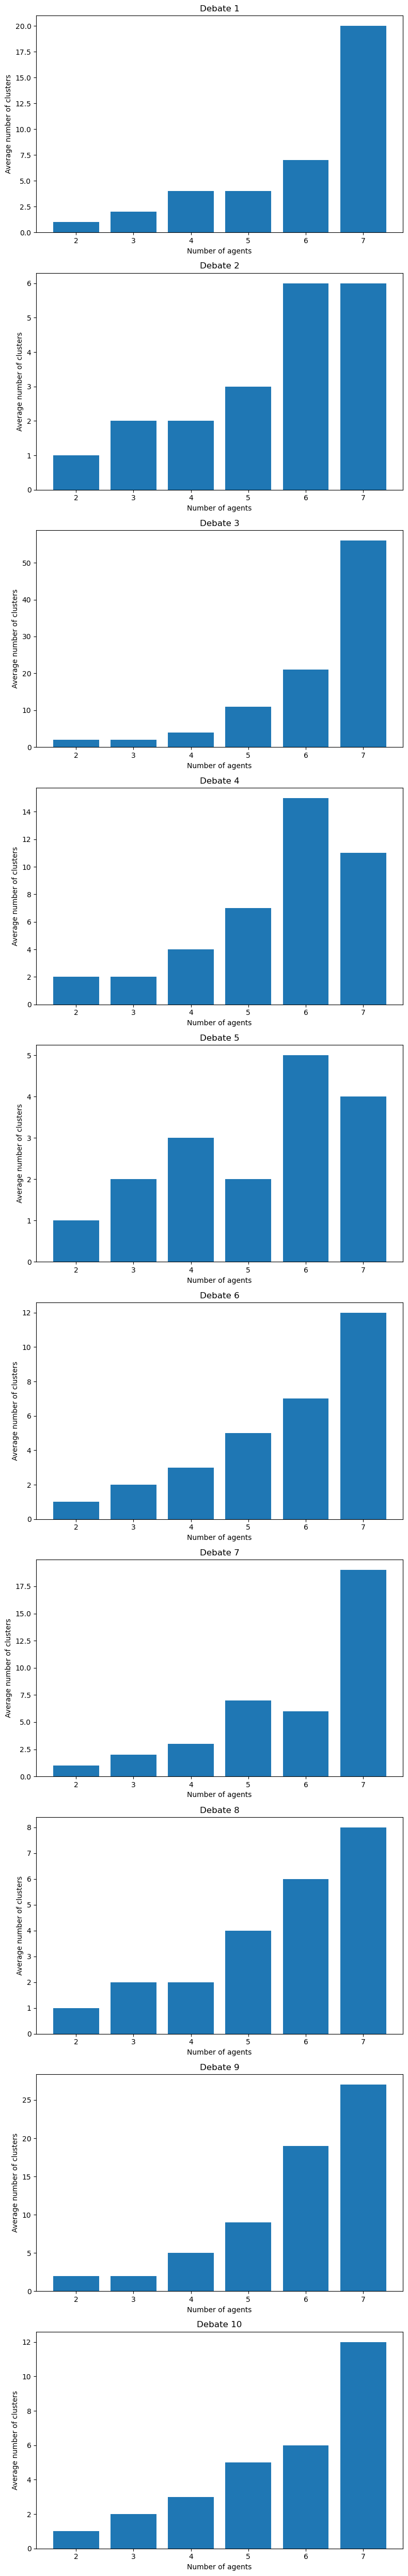

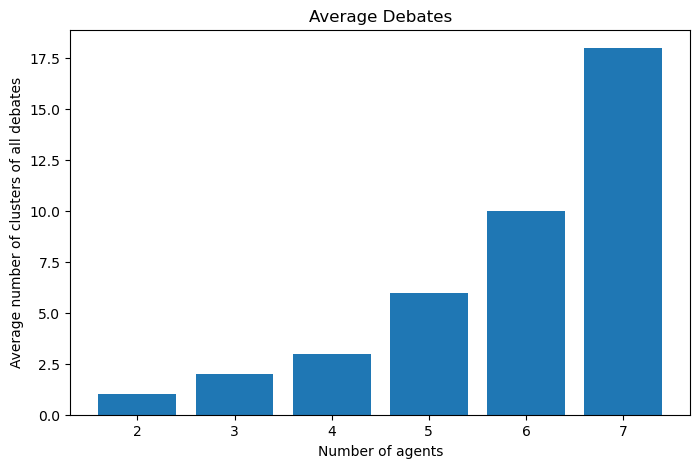

In [214]:
# Number of cluster / Number of agents

import matplotlib.pyplot as plt

number_of_agents = list(cluster_counts_list[0].keys())
cluster_values = [list(d.values()) for d in cluster_counts_list]

fig, axes = plt.subplots(nrows=len(cluster_values), ncols=1, figsize=(8, 5*len(cluster_values)))

for i, ax in enumerate(axes):
    ax.bar(range(len(cluster_values[i])), cluster_values[i], tick_label=[n for n in number_of_agents])
    ax.set_xlabel("Number of agents")
    ax.set_ylabel("Average number of clusters")
    ax.set_title(f"Debate {i+1}")

plt.tight_layout()
plt.show()

avg_debate = []
sum = 0
for i in range(len(number_of_agents)):
    for j in range(len(cluster_values)):
        sum += cluster_values[j][i] 
    avg_debate.append(round(sum/len(cluster_values)))
    sum = 0

plt.figure(figsize=(8, 5))
plt.bar(range(len(avg_debate)), [n_cluster for n_cluster in avg_debate], tick_label=[n for n in number_of_agents])

plt.xlabel("Number of agents") 
plt.ylabel("Average number of clusters of all debates") 
plt.title(f"Average Debates")
plt.show()

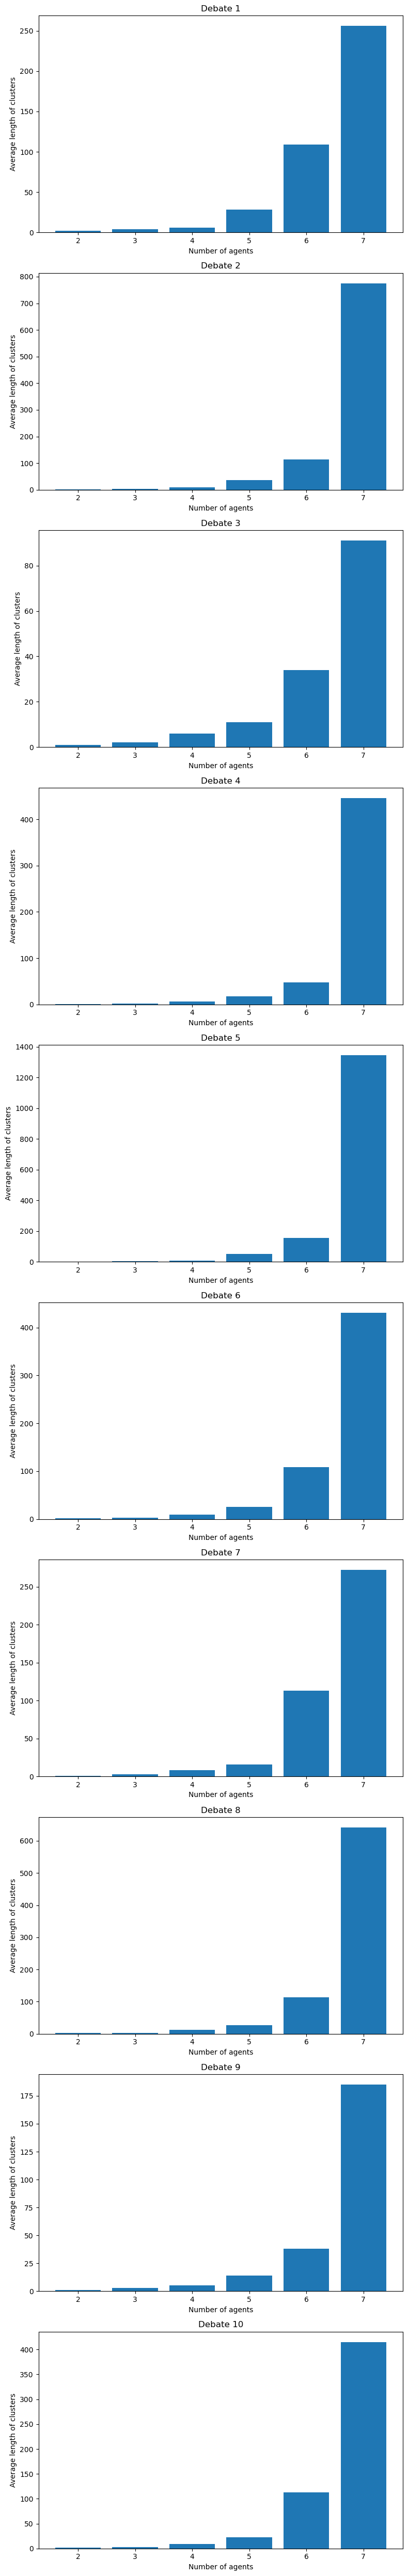

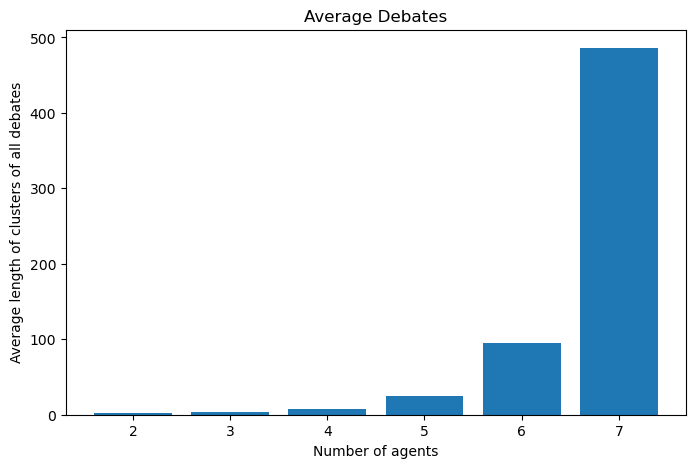

In [215]:
# Length of cluster / Number of agents

import matplotlib.pyplot as plt

number_of_agents = list(cluster_length_list[0].keys())
cluster_values = [list(d.values()) for d in cluster_length_list]

fig, axes = plt.subplots(nrows=len(cluster_values), ncols=1, figsize=(8, 5*len(cluster_values)))

for i, ax in enumerate(axes):
    ax.bar(range(len(cluster_values[i])), cluster_values[i], tick_label=[n for n in number_of_agents])
    ax.set_xlabel("Number of agents")
    ax.set_ylabel("Average length of clusters")
    ax.set_title(f"Debate {i+1}")

plt.tight_layout()
plt.show()

avg_debate = []
sum = 0
for i in range(len(number_of_agents)):
    for j in range(len(cluster_values)):
        sum += cluster_values[j][i] 
    avg_debate.append(round(sum/len(cluster_values)))
    sum = 0

plt.figure(figsize=(8, 5))
plt.bar(range(len(avg_debate)), [n_cluster for n_cluster in avg_debate], tick_label=[n for n in number_of_agents])

plt.xlabel("Number of agents") 
plt.ylabel("Average length of clusters of all debates") 
plt.title(f"Average Debates")
plt.show()